In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
df1 = pd.read_csv(r"C:\Users\mehul\Downloads\Pranjali\DPU\ML\USA_Housing_Dataset.csv")

In [23]:
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [24]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [25]:
df2 = df1.drop(['date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'street', 'statezip' , 'country'], axis = 1)

In [26]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built',
       'yr_renovated', 'city'],
      dtype='object')

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4140 non-null   float64
 1   bedrooms      4140 non-null   float64
 2   bathrooms     4140 non-null   float64
 3   sqft_living   4140 non-null   int64  
 4   yr_built      4140 non-null   int64  
 5   yr_renovated  4140 non-null   int64  
 6   city          4140 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 226.5+ KB


In [28]:
df2.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
yr_built        0
yr_renovated    0
city            0
dtype: int64

In [29]:
df2.bedrooms.unique()

array([3., 4., 5., 2., 1., 6., 7., 8., 0.])

In [30]:
len(df2[df2.bedrooms == 0])

2

In [31]:
df3 = df2[~(df2.bedrooms == 0)]
df3.shape

(4138, 7)

In [32]:
len(df2[df2.price == 0])

49

In [33]:
df3 = df2[~(df2.price == 0)]
df3.shape

(4091, 7)

In [34]:
df3.city.isna().sum()

0

In [35]:
df3[(df3.yr_built < 1975) & (df3.yr_renovated < 2000)].head()

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city
9,842500.0,4.0,2.50,2160,1902,0,Seattle
14,927000.0,4.0,2.75,3300,1953,0,Clyde Hill
16,341000.0,3.0,1.50,1720,1952,0,Shoreline
17,235000.0,1.0,1.00,810,1941,0,Seattle
18,1200000.0,3.0,1.75,1560,1928,0,Mercer Island


In [36]:
df4 = df3[~((df3.yr_built < 1975) & (df3.yr_renovated < 2000))]
df4.shape

(2677, 7)

In [37]:
df5= df4.copy()
df5['price_per_sqft'] = df5['price']/df5['sqft_living']
df5.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,price_per_sqft
0,376000.0,3.0,2.00,1340,2008,0,Seattle,280.597015
1,800000.0,4.0,3.25,3540,2007,0,Carnation,225.988701
2,2238888.0,5.0,6.50,7270,2010,0,Issaquah,307.962586
3,324000.0,3.0,2.25,998,2007,0,Seattle,324.649299
4,549900.0,5.0,2.75,3060,1979,0,Seattle,179.705882


In [38]:
df5.city = df5.city.apply(lambda x:x.strip())
location_stats = df5.groupby('city')['city'].agg('count').sort_values(ascending= False)
location_stats

city
Seattle             680
Renton              185
Redmond             181
Bellevue            170
Sammamish           147
Issaquah            147
Kent                138
Auburn              117
Kirkland            116
Woodinville          88
Federal Way          87
Maple Valley         82
Snoqualmie           58
Shoreline            46
Kenmore              42
North Bend           39
Mercer Island        38
Duvall               37
Covington            31
Des Moines           30
Bothell              29
Burien               24
Newcastle            24
Tukwila              18
Lake Forest Park     18
SeaTac               17
Vashon               17
Carnation            15
Enumclaw             12
Fall City             8
Medina                7
Pacific               6
Normandy Park         5
Clyde Hill            4
Black Diamond         4
Ravensdale            3
Milton                2
Algona                1
Snoqualmie Pass       1
Skykomish             1
Preston               1
Yarrow Poin

In [39]:
len(location_stats[location_stats<=10])

13

In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10]
df5.city = df5.city.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

In [41]:
df5[df5.sqft_living/df5.bedrooms<300].head()

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,price_per_sqft
302,295000.0,3.0,1.5,850,1986,0,Seattle,347.058824
681,180000.0,3.0,1.0,870,1969,2014,Covington,206.896552
720,295000.0,4.0,2.0,980,1978,0,North Bend,301.020408
731,398000.0,2.0,1.0,590,1983,2009,Other,674.576271
823,90000.0,2.0,1.0,580,1943,2002,Seattle,155.172414


In [42]:
df5.shape

(2677, 8)

In [43]:
df6 = df5[~(df5.sqft_living/df5.bedrooms<300)]
df6.shape

(2665, 8)

In [44]:
df6.price_per_sqft.describe()

count     2665.000000
mean       257.690055
std        456.067209
min         55.906040
25%        175.666667
50%        231.800766
75%        294.117647
max      22533.898305
Name: price_per_sqft, dtype: float64

(array([2.663e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   55.90604027,  2303.70526675,  4551.50449323,  6799.30371971,
         9047.10294619, 11294.90217268, 13542.70139916, 15790.50062564,
        18038.29985212, 20286.0990786 , 22533.89830508]),
 <BarContainer object of 10 artists>)

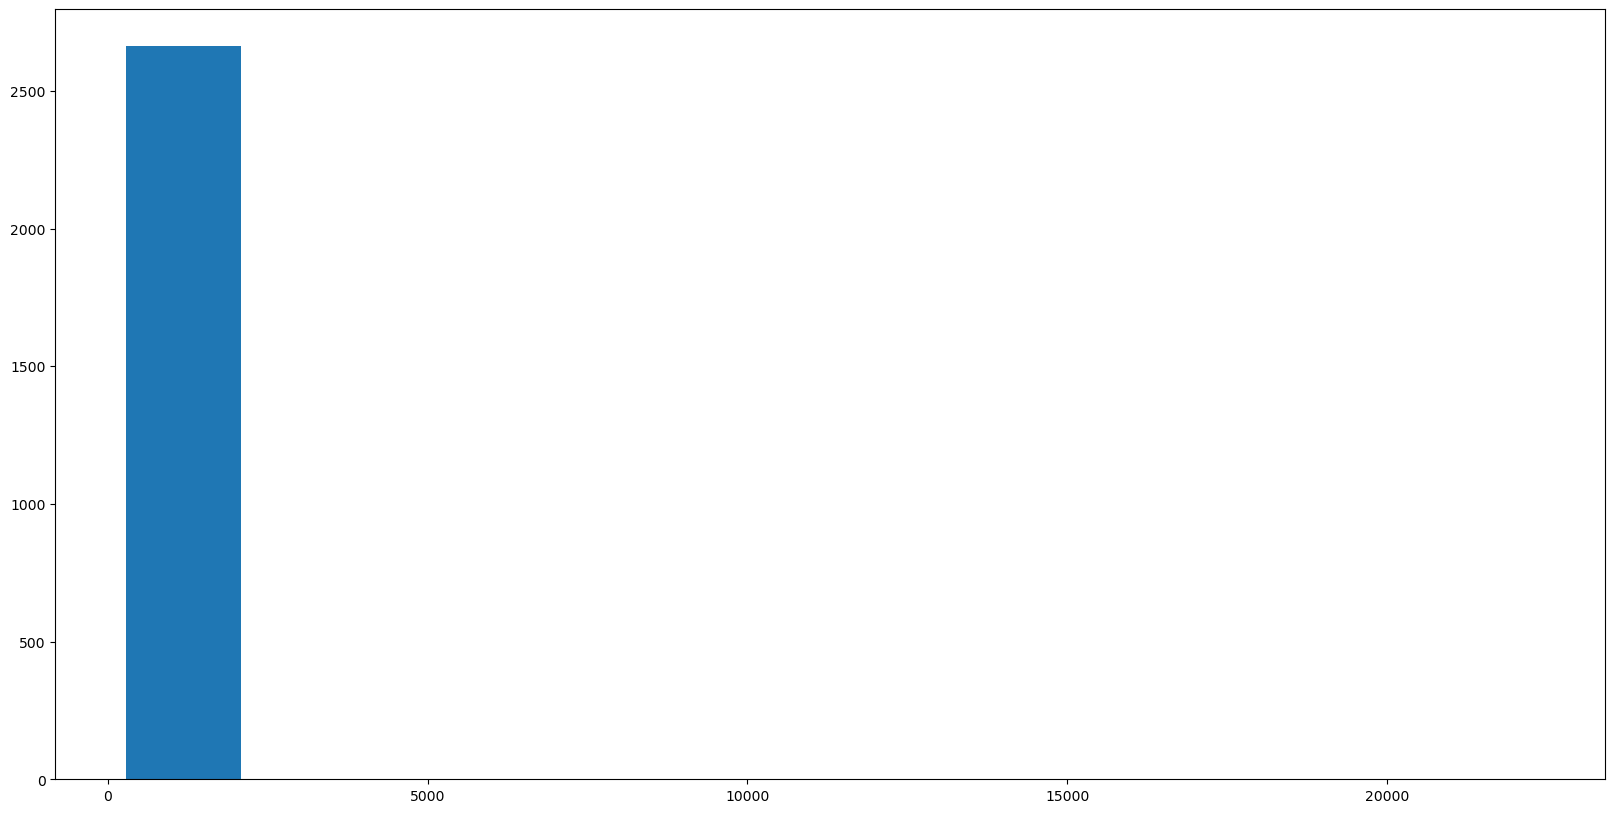

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)

In [46]:
df6.shape


(2665, 8)

In [47]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for k, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df7 = remove_outliers(df6)
df7.shape

(2191, 8)

(array([ 15., 342., 474., 529., 427., 196., 121.,  53.,  21.,  13.]),
 array([ 60.3330292 , 110.2594037 , 160.1857782 , 210.1121527 ,
        260.0385272 , 309.9649017 , 359.89127619, 409.81765069,
        459.74402519, 509.67039969, 559.59677419]),
 <BarContainer object of 10 artists>)

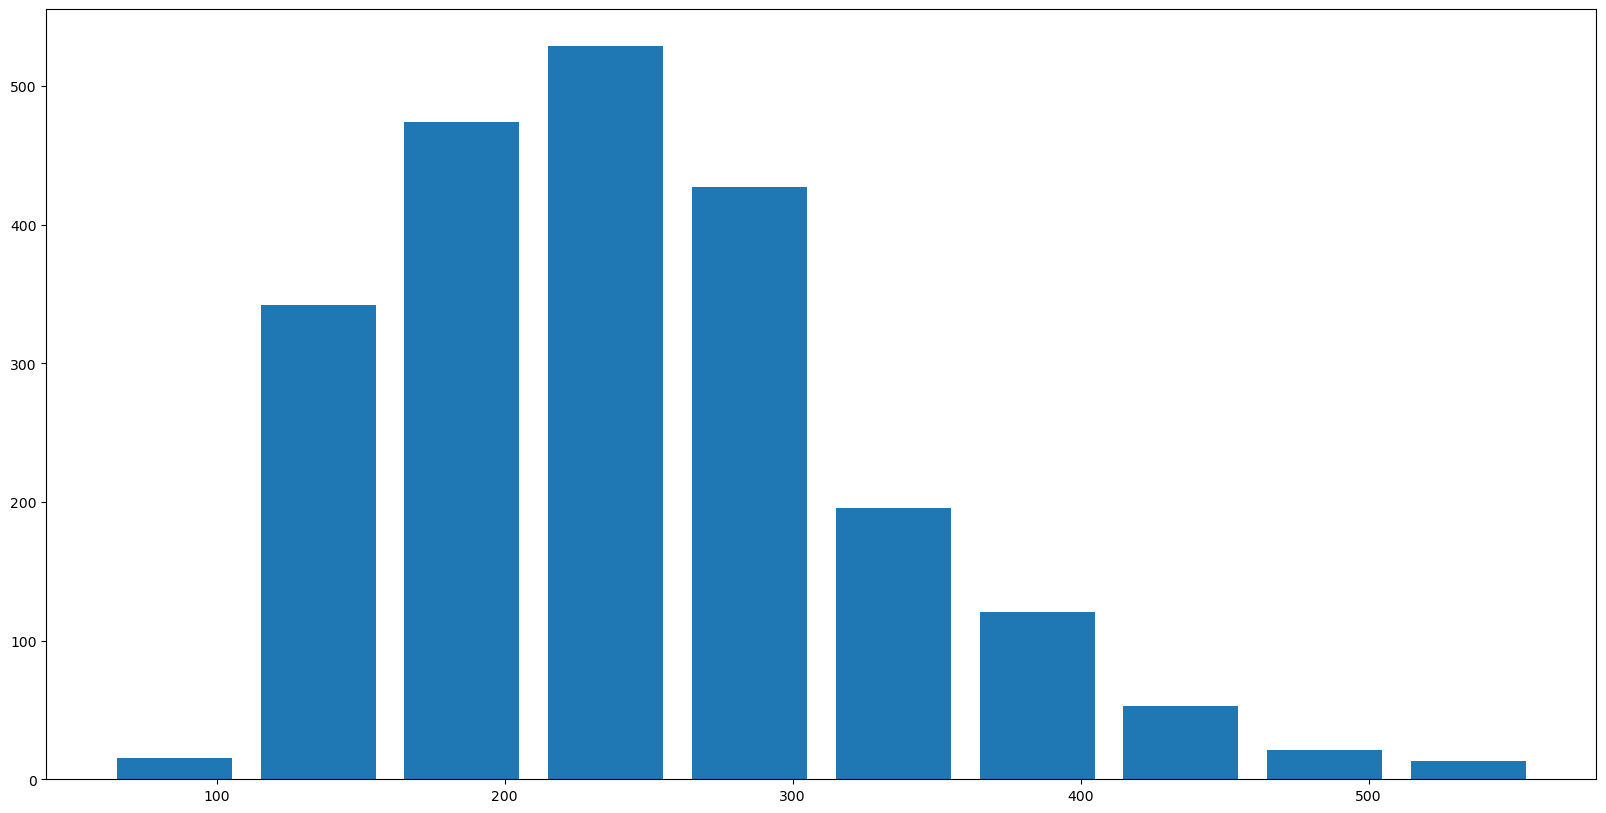

In [48]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)

In [49]:
df7.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,price_per_sqft
0,185000.0,3.0,1.5,1370,1961,2001,Auburn,135.036496
1,287600.0,3.0,2.5,1950,1990,2009,Auburn,147.487179
2,225000.0,3.0,1.0,1660,1963,2008,Auburn,135.542169
3,265000.0,3.0,2.0,1570,1998,2006,Auburn,168.789809
4,316000.0,4.0,2.5,2010,1995,0,Auburn,157.213930


In [50]:
df8 = df7.drop(['yr_built', 'yr_renovated', 'price_per_sqft'], axis =1)

In [51]:
df8.head()

,price,bedrooms,bathrooms,sqft_living,city
0,185000.0,3.0,1.5,1370,Auburn
1,287600.0,3.0,2.5,1950,Auburn
2,225000.0,3.0,1.0,1660,Auburn
3,265000.0,3.0,2.0,1570,Auburn
4,316000.0,4.0,2.5,2010,Auburn


In [52]:
dummies = pd.get_dummies(df8.city)
dummies.head()

,Auburn,Bellevue,Bothell,Burien,Carnation,Covington,Des Moines,Duvall,Enumclaw,Federal Way,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df9 = pd.concat([df8,dummies.drop('Other',axis=1)],axis=1)
df9.head()


,price,bedrooms,bathrooms,sqft_living,city,Auburn,Bellevue,Bothell,Burien,Carnation,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,185000.0,3.0,1.5,1370,Auburn,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,287600.0,3.0,2.5,1950,Auburn,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,225000.0,3.0,1.0,1660,Auburn,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,265000.0,3.0,2.0,1570,Auburn,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,316000.0,4.0,2.5,2010,Auburn,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df10 =df9.drop('city',axis=1)
df10.head(2)

,price,bedrooms,bathrooms,sqft_living,Auburn,Bellevue,Bothell,Burien,Carnation,Covington,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,185000.0,3.0,1.5,1370,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,287600.0,3.0,2.5,1950,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df10.shape


(2191, 33)

In [56]:
X = df10.drop('price',axis=1)
Y = df10.price
Y.head()

0    185000.0
1    287600.0
2    225000.0
3    265000.0
4    316000.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [137]:
from sklearn.linear_model import LinearRegression
lnr_regressor = LinearRegression()
lnr_regressor.fit(X_train,Y_train)
lnr_regressor.score(X_test,Y_test)

0.7946733630146167

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.8340727 , 0.81673766, 0.80534429, 0.82406393])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
                'splitter': ['best', 'random']
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gcv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gcv.fit(X,Y)
        scores.append({
        'model': algo_name,
        'best_score': gcv.best_score_,
        'best_params': gcv.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.820876,{'fit_intercept': False}
1,lasso,0.820116,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.685082,"{'criterion': 'poisson', 'splitter': 'random'}"
3,SVR,0.620929,{'kernel': 'linear'}


In [121]:
def predict_price(city,bedroom,bath,sqft):
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0]=bedroom
    x[1]=bath
    x[2]=sqft
    if loc_index >= 0:
        x[loc_index]=1
    return lnr_regressor.predict([x])[0]


In [131]:
predict_price('Seattle',2,2,1000)

C:\Users\mehul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


367737.17655563646

In [133]:
predict_price('Seattle',3,2,2000)

C:\Users\mehul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


578104.180890216

In [64]:
predict_price('Maple Valley',2,2,1000)

C:\Users\mehul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


125951.96671876677